# NN Model (Online dataset - Using Keras)

In [3]:
# extraction
import numpy as np 
import matplotlib.pyplot as plt  
import math
import  cv2


# model
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
# split and other utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [30]:
from pylab import *


# Distribution: Training = 102496; Testing = 1000

In [4]:
# Loading dataset

# X = np.genfromtxt("Training_Data.csv", delimiter =',')  
# Y = np.genfromtxt("Training_Labels.csv", delimiter =',')  

train_X = np.load("online_dataset/train_X.npy")
train_Y = np.load("online_dataset/train_y.npy")
test_X = np.load("online_dataset/test_X.npy")
test_Y = np.load("online_dataset/test_y.npy")

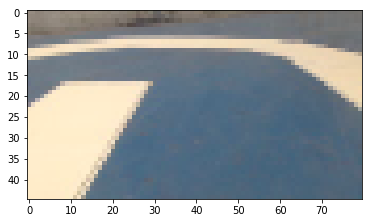

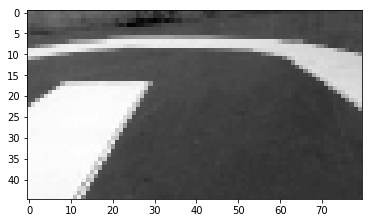

In [28]:
# Glimpse of online dataset 

labels = ["forward", "left", "right"]
img = train_X[800].reshape(45,80,3)

plt.imshow(img)
plt.show()


img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = "gray")
plt.show()



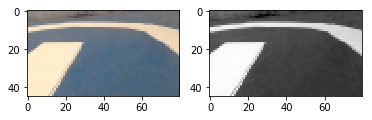

In [33]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(img1, cmap = "gray")


In [15]:
train_X[0].shape

(10800,)

# Canny Edge Detection

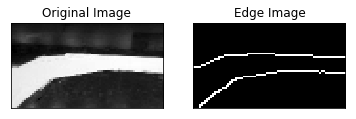

In [8]:
img = cv2.cvtColor(np.reshape(train_X[8000], (45,80, 3)), cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,100,200)

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Converting color images to gray scale and saving

In [ ]:
# Preprocessing for online dataset 

train_X_new = np.empty((train_X.shape[0], 45*80))
index = 0

for record in train_X:    
    sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
    sample = sample.reshape((1,45*80))
    sample = (np.asfarray(sample)/ 255.0) 
    if index < train_X.shape[0]:
        train_X_new[index, :] = sample
    index = index + 1


test_X_new = np.empty((test_X.shape[0], 45*80))
index = 0

for record in test_X:    
    sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
    sample = sample.reshape((1,45*80))
    sample = (np.asfarray(sample)/ 255.0) 
    if index < test_X.shape[0]:
        test_X_new[index, :] = sample
    index = index + 1

In [ ]:
# Correcting nomenclature

train_X_old = train_X
test_X_old = test_X
train_X = train_X_new
test_X = test_X_new

print(train_X_old.shape, test_X_old.shape, train_X.shape, test_X.shape)

In [ ]:
# train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=13)
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
print(train_X.shape, valid_X.shape, train_Y.shape, valid_Y.shape)

In [ ]:
train_Y = to_categorical(train_Y, num_classes = 3)
valid_Y = to_categorical(valid_Y, num_classes = 3)

In [ ]:
print(train_Y.shape, train_Y)
print(valid_Y.shape, valid_Y)

In [ ]:
row = 45
col = 80

In [ ]:
del model

In [ ]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(output_dim = 64, init = 'uniform', activation = 'sigmoid', input_dim = row*col))

# # Adding the second hidden layer
# model.add(Dense(output_dim = 32, init = 'uniform', activation = 'sigmoid'))

# Adding the output layer
model.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))

epochs = 25
learning_rate = 0.05
decay_rate = learning_rate/epochs
momentum = 0.8
sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov=False)

# Compiling the ANN
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [ ]:
model.summary()

# Training and Validation Accuracy / Losses

In [ ]:
# Fitting the ANN to the Training set
history = model.fit(train_X, train_Y, batch_size = 5, epochs = epochs, validation_data=(valid_X, valid_Y))

In [ ]:
print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate using Test data
test_Y_ = to_categorical(test_Y)
scores = model.evaluate(test_X, test_Y_, verbose = 0)

print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# Predicting the Test Results
pred_y = model.predict(test_X)
print(pred_y.shape,"\n", pred_y)

i=0
pred_Y = np.empty((pred_y.shape[0],1))
for rec in pred_y:
    pred_Y[i] = np.argmax(rec > 0.5)
    i = i+1
    
print(pred_Y.shape)

In [ ]:
test_Y, pred_Y

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
test_Y = test_Y.reshape((test_Y.shape[0],1))  # to make a 2d matrix
cm = confusion_matrix(test_Y,pred_Y)
print(cm,"\n")

print("Confusion Matrix : \n")
for i in range(3):
    print(np.round(cm[i]/np.sum(cm[i])*100,2))
    #cm[i] = np.round((cm[i]/np.sum(cm[i])) * 100,2)
    
# Performance accuracy 
accuracy = ((test_Y == pred_Y)==True).sum() / len(test_Y) * 100
print("\nAccuracy = "+ str(accuracy) + "%\n")

In [ ]:
model.save('online_model.h5')

# Result of using batch normalization

In [ ]:
arr = np.array([0.3, 0.2, 0.065, 0.07])
print(np.argmax(arr > 0.5))

In [1]:
102496 - 81996

20500

In [1]:
102496/3

34165.333333333336

In [5]:
train_Y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [6]:
train_Y == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
train_Y[4]

0

In [8]:
train_Y[500]

0

In [9]:
test_Y

array([1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1,
       1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0,